<a href="https://colab.research.google.com/github/kdambrowski/Data_science/blob/main/Unsupervision_SSE_and_silhouette.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

import plotly.graph_objs as go
from plotly.offline import iplot
import matplotlib.pylab as plt
from numpy.random import RandomState

In [ ]:
# obliczanie dystansu
def calculate_distance(xs, ys):
  result = 0 # zmienna do zbierania wyniku
  for x1, y1 in zip(xs, ys): # łączy zmienne z 1 grupy
    for x2, y2 in zip(xs, ys):
#wykorzystujemy miary euklidesowe
# do obliczenia odległości pomiędzy punktami
      result += np.sqrt((x1 - x2)**2 + (y1 -y2)**2)
  return result

# obliczanie średnio kwadratowej odległości wewnątrz klastra
def sse(clusters): # dajemy 1 claster do sprawdzenia
  result = 0 # zbiorniczek
  for xs, ys in clusters:
    # obliczenie kwadrató odległości między pkt w klastrze
    distance = calculate_distance(xs, ys)
# obliczenie średniokwadratowej odległości w klastrze
    result += distance /len(xs)
# można to też zapisać tak:
# result += calculate_distance(xs,ys)/len(xs)
  return result

# obliczanie przynależności pkt do danego klastra
def dist_to_cluster(point, cluster):
    x_i, y_i = point
    xs, ys = cluster
    distances = 0
    for x_j, y_j in zip(xs, ys):
        distances += np.sqrt((x_j - x_i)**2 + (y_j - y_i)**2)
    return distances

# oblicza parametr a czyli średnią wartość punktu vs inne pkt wewnątrz klastra
def a(point, cluster):
    distances = dist_to_cluster(point, cluster)
    return 1 / (len(cluster[0]) - 1) * distances

# oblicza średnia odległość pkt do pkt z innych klastrów 
def b(point, other_clusters):
    x_i, y_i = point
    result = [1 / len(cluster[0]) * dist_to_cluster(point, cluster) 
              for cluster 
              in other_clusters]
    return min(result)

# obliczanie silhourette jeżeli s=>1 to pkt należy do klastra 1
# jeżeli s=>-1 to należy do innego niż podany klaster
# s=>0 ciężko powiedzieć gdzie powinien należeć:p
# wyznaczenie jakiegoś pkt z palca, klaster który chcemy badać,[ inne klastry]
def silhouette(point, cluster, other_clusters):
    if len(cluster) == 1:
        return 0
    else:
      # promień dla pkt a
        ar = a(point, cluster)
      # promień dla pkt b
        br = b(point, other_clusters)
        return (br - ar) / max(ar, br)

#oblicza globalny wynik klasteryzacji
# w cluster trzeba podać słowniki
def global_silhouette(clusters):
  if len(clusters) == 1:
    return 0
  results = []
  for key, cluster in clusters.items():
      other_clusters = [c for k, c in clusters.items() if k != key]
      for point in zip(*cluster):
          s = silhouette(point, cluster, other_clusters)
          results.append(s)
  return np.mean(results)

def calculate_distance(xs, ys):
    result = 0
    for x1, y1 in zip(xs, ys):
        for x2, y2 in zip(xs, ys):
            result += np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return result

def sse(clusters):
    result = 0
    for xs, ys in clusters:
        distance = calculate_distance(xs, ys)
        result += distance / len(xs)
    return result

def show_clusters(clusters, model_desc):
  fig, ax = plt.subplots()
  no_clusters = len(clusters)

  for x,y in clusters:
    ax.scatter(x, y)
    ax.set_title(f'{model_desc} - with {no_clusters} clusters')
    plt.xlabel('x coord.')
    plt.ylabel(f'my y axis for {model_desc}')
  plt.show()

In [ ]:
rnd = RandomState(25)
x1 = sorted(list(rnd.normal(1.0, 0.5, size=100)))
y1 = list(rnd.normal(2.0, 0.4, size=100))
x2 = sorted(list(rnd.normal(2.0, 0.3, size=100)))
y2 = list(rnd.normal(4.0, 0.4, size=100))
x3 = sorted(list(rnd.normal(2.5, 0.4, size=100)))
y3 = list(rnd.normal(2.0, 0.5, size=100))

# First situation - 1 cluster:
first_model = [(x1+x2+x3, y1+y2+y3)]

# Second situation - 2 clusters:
second_model = [(x1+x3, y1+y3), (x2,y2)]

# Third situation - 3 clusters:
third_model = [(x1, y1), (x2, y2), (x3, y3)]

# Fourth situation - 4 clusters:
fourth_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]), 
                (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
                (x2, y2), (x3, y3)]

# Fifth situation - 5 clusters:
fifth_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]), 
               (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
               (x2[:int(len(x2)/2)], y2[:int(len(y2)/2)]), 
               (x2[int(len(x2)/2):], y2[int(len(y2)/2):]),
               (x3, y3)]

# Sixth situation - 6 clusters:
sixth_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]), 
               (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
               (x2[:int(len(x2)/2)], y2[:int(len(y2)/2)]), 
               (x2[int(len(x2)/2):], y2[int(len(y2)/2):]),
               (x3[:int(len(x3)/2)], y3[:int(len(y3)/2)]), 
               (x3[int(len(x3)/2):], y3[int(len(y3)/2):
               ])]
               
models = [first_model, second_model, third_model, 
          fourth_model, fifth_model, sixth_model]
          
models_str = [
    'first_model', 'second_model', 'third_model',
    'fourth_model', 'fifth_model', 'sixth_model'
]


SSE FOR first_model is:  491.6725949099922


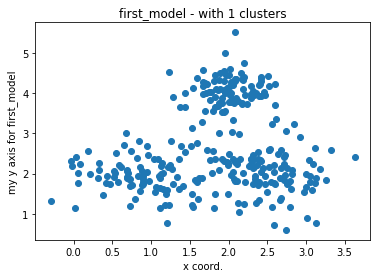


SSE FOR second_model is:  313.1254420723164


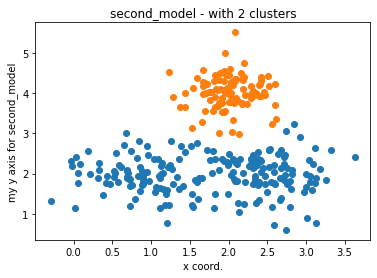


SSE FOR third_model is:  227.3676047031479


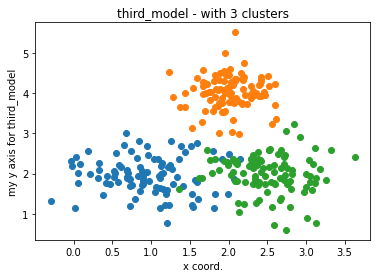


SSE FOR fourth_model is:  208.13360625595936


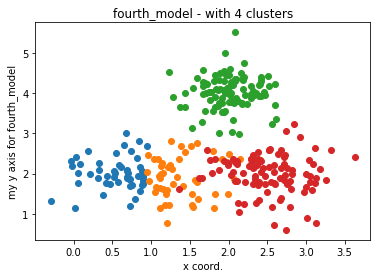


SSE FOR fifth_model is:  199.08077810858907


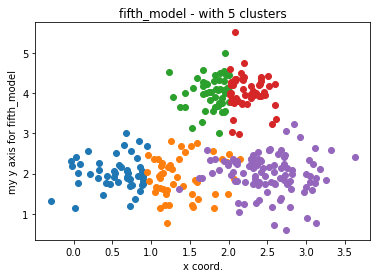


SSE FOR sixth_model is:  184.63190502848084


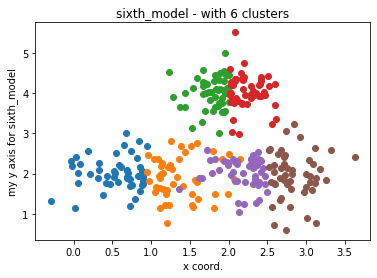

In [ ]:
distances = []
distances_sil=[]
for model, model_str in zip(models, models_str):
  #print(model_str)
  print(f'\nSSE FOR {model_str} is:  {sse(model)}')
  show_clusters(model, model_str)

  distances.append(sse(model))

  model_dict = {i:cluster for i, cluster in enumerate(model)}

  distances_sil.append(
      global_silhouette(model_dict)
  )
#   break

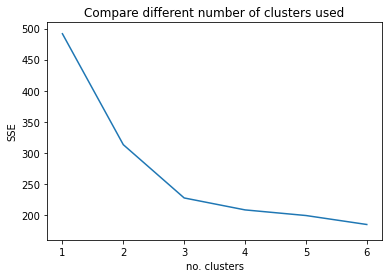

In [ ]:
plt.plot(
    list(range(1, len(distances)+1)),
    distances
)

plt.title('Compare different number of clusters used')
plt.xlabel('no. clusters')
plt.ylabel('SSE')
plt.ylim([160, 510])
plt.show()

In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
trace1=go.Scatter(
    x=list(range(1, len(distances)+1)),
    y=distances,
    mode='lines',
    name = 'SSE',
    marker=dict(color='rgba(0,0,200,0.8)'),
    text=models_str)

layout=dict(title='Compare different number of clusters used SSE',
            xaxis=dict(title='No, clusters',ticklen=5,zeroline=True))
# tworzenie figury
fig=dict(data=trace1,layout=layout)
#wyświetlenie wykresu
iplot(fig)

In [ ]:
xy_sil_coor= [[i+1, max_dist] for i, max_dist in enumerate(distances_sil) if max_dist == max(distances_sil)]
best_cluster_no_sill = xy_sil_coor[0][0]
best_value_sill = xy_sil_coor[0][1]
print(best_cluster_no_sill,best_value_sill,xy_sil_coor,np.array(xy_sil_coor)[0,0], sep='\n')

3
0.5362290899934827
[[3, 0.5362290899934827]]
3.0


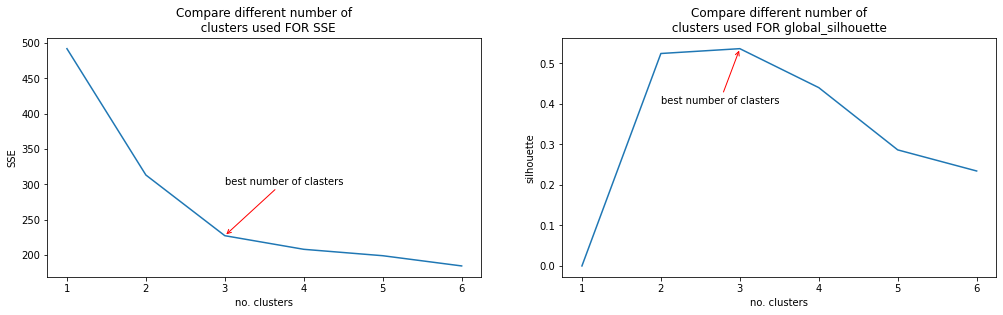

In [ ]:
fig , ax = plt.subplots(1,2, figsize=(15,5))
fig.tight_layout(pad=5.0)

ax[0].plot(
    list(range(1, len(distances)+1)),
    distances
)

ax[0].set_title('Compare different number of\n  clusters used FOR SSE')
ax[0].set_xlabel('no. clusters')
ax[0].set_ylabel('SSE')
ax[0].annotate('best number of clasters',
               xy=[3,distances[2]],
               arrowprops={'arrowstyle':'->','color':'red'}, xytext=(3,300)
               )

ax[1].plot(
    list(range(1, len(distances_sil)+1)),
    distances_sil
)

ax[1].annotate('best number of clasters',
               xy=(best_cluster_no_sill,best_value_sill),
               arrowprops={'arrowstyle':'->', 'color':'red'},
               xytext=(2,0.4)
               )


ax[1].set_title('Compare different number of\n clusters used FOR global_silhouette ')
ax[1].set_xlabel('no. clusters')
ax[1].set_ylabel('silhouette')
plt.show()
